In [1]:
%load_ext autoreload
%autoreload 2
# this only works on startup!
from jax import config
config.update("jax_enable_x64", True)

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from signal_utils_1D import *


## Max mutual information vs sampling density for different samples

In [2]:
N_objects = 2000
num_bootstraps = 10
noise_sigma = 1e-3
num_samples = np.linspace(2, 96, 12).astype(int)

objects_dict = {
  'delta_uniform': lambda : np.array([sample_amplitude_object('delta', num_deltas=1, gaussian_mixture_position=False) for i in range(N_objects)]),
  'delta_nonuniform': lambda: np.array([sample_amplitude_object('delta', num_deltas=1, gaussian_mixture_position=True) for i in range(N_objects)]),
  'white_noise': lambda : np.array([sample_amplitude_object('white_noise') for i in range(N_objects)]),
  'pink_noise': lambda : np.array([sample_amplitude_object('pink_noise') for i in range(N_objects)]),
  '8_deltas_uniform': lambda :np.array([sample_amplitude_object('delta', num_deltas=8, gaussian_mixture_position=False) for i in range(N_objects)]),
  '8_deltas_nonuniform': lambda : np.array([sample_amplitude_object('delta', num_deltas=8, gaussian_mixture_position=True) for i in range(N_objects)]),
}

# num_nyquist_samples = int(NUM_NYQUIST_SAMPLES // 2)
num_nyquist_samples = NUM_NYQUIST_SAMPLES

mi_by_object = {}
for name, objects_fn in objects_dict.items():
  print(name)
  mutual_information = []
  for N in tqdm(num_samples):
    erasure_mask = onp.zeros(OBJECT_LENGTH)
    sample_indices = onp.linspace(0, OBJECT_LENGTH - 1, N).astype(int)
    erasure_mask[sample_indices] = 1
    erasure_mask = np.array(erasure_mask, dtype=bool)
    mi_bootstraps = []
    for k in range(num_bootstraps):
      initial_kernel, initial_params, optimized_params, objects, initial_mi, optimized_mi = optimize_PSF_and_estimate_mi(
          objects_fn, noise_sigma, erasure_mask, num_nyquist_samples=num_nyquist_samples, nyquist_sample_output=False)
      mi_bootstraps.append(optimized_mi)

    mutual_information.append(mi_bootstraps)
  mi_by_object[name] = mutual_information


delta_uniform


  0%|                                                        | 0/12 [00:00<?, ?it/s]

initial loss -3.5912770447503473
initial loss -3.2987968411116784
initial loss -3.152479465437346
initial loss -3.340948943971736
initial loss -2.9113432333475773
initial loss -3.3790454261698897
initial loss -3.216958506938745
initial loss -3.6507016238699492
initial loss -3.3093854193117367
initial loss -2.885424159271221


  8%|███▊                                         | 1/12 [09:18<1:42:24, 558.59s/it]

initial loss -3.888286663337304
initial loss -3.589613252537797
initial loss -3.459334926094487
initial loss -3.4665520229186217
initial loss -3.888029756942232
initial loss -3.865942804419403
initial loss -3.4984925444342467
initial loss -3.499093691087498
initial loss -3.302601979884998
initial loss -3.5552879680244653


 17%|███████▌                                     | 2/12 [25:38<2:14:22, 806.29s/it]

initial loss -3.276606081737756
initial loss -3.5485749936319944
initial loss -3.2894111731121733
initial loss -3.2837884245100386
initial loss -3.7285684876983805
initial loss -3.5766187923241417
initial loss -3.5724623958589063
initial loss -3.632470132176749
initial loss -3.797366833591391
initial loss -3.569819839155866


 25%|███████████▎                                 | 3/12 [44:40<2:23:56, 959.56s/it]

initial loss -3.4586025102049804
initial loss -3.456166315886192
initial loss -3.5212214178423826
initial loss -3.460394788589393
initial loss -3.184587281108365
initial loss -3.4563361060799176
initial loss -3.449959502901843
initial loss -3.1743648085987886
initial loss -3.6329406353188842
initial loss -3.4948270932908203


 33%|███████████████                              | 4/12 [53:23<1:44:59, 787.44s/it]

initial loss -2.6703558408395414
initial loss -2.959151687457919
initial loss -3.1798407890053495
initial loss -3.1609969558372697
initial loss -3.049665174077747
initial loss -3.403888209821173
initial loss -3.02681217328817
initial loss -2.993067933319913
initial loss -3.2174392238082685
initial loss -2.9569141967918964


 42%|█████████████████▉                         | 5/12 [1:01:57<1:20:21, 688.80s/it]

initial loss -2.3411363293684153
initial loss -2.625577507304844
initial loss -2.4868296756867547
initial loss -2.4742768197463945
initial loss -2.5123338079804824
initial loss -2.6553285601253465
initial loss -2.6161542002880354
initial loss -2.7651757381353295
initial loss -2.3883227466168395
initial loss -2.784653808954236


 50%|█████████████████████▌                     | 6/12 [1:15:22<1:12:50, 728.34s/it]

initial loss -2.458823755153593
initial loss -2.2451818781156825
initial loss -2.4924370335977244
initial loss -2.2270344820573635
initial loss -2.234618912600101
initial loss -2.42676806018262
initial loss -2.2852077451144397
initial loss -2.3017126927291285
initial loss -2.1417682423836557
initial loss -2.29936232397643


 58%|█████████████████████████                  | 7/12 [1:33:24<1:10:18, 843.78s/it]

initial loss -1.9370094980366976
initial loss -1.8745042091824315
initial loss -2.0002804651750794
initial loss -2.1193437767925607
initial loss -1.9598328318108105
initial loss -1.9390355962134067
initial loss -2.009876498612179
initial loss -2.004464713567304
initial loss -2.197340576379432
initial loss -1.9855547422390858


 67%|████████████████████████████▋              | 8/12 [1:52:56<1:03:14, 948.51s/it]

initial loss -1.9842877079815955
initial loss -1.5910184087585098
initial loss -1.7784112385063833
initial loss -1.9773834760683258
initial loss -1.7712373776493033
initial loss -1.9194414713264376
initial loss -1.8092419538045903
initial loss -1.7709010833607461
initial loss -1.680153516766901
initial loss -1.6798601044674784


 75%|█████████████████████████████████           | 9/12 [2:21:09<59:03, 1181.21s/it]

initial loss -1.5943875774066216
initial loss -1.628358207086949
initial loss -1.531659745028737
initial loss -1.6877749598616596
initial loss -1.6541359226094954
initial loss -1.580778977958546
initial loss -1.6507339693152068
initial loss -1.5884131778103217
initial loss -1.6680272318904872
initial loss -1.7350366098724208


 83%|███████████████████████████████████▊       | 10/12 [2:51:12<45:45, 1372.98s/it]

initial loss -1.631821078689359
initial loss -1.5458555264316243
initial loss -1.373586572501017
initial loss -1.665158523369269
initial loss -1.5576386500823418
initial loss -1.4519656817965128
initial loss -1.5358127577111302
initial loss -1.61825522507645
initial loss -1.699421110391716
initial loss -1.5129107961589325


 92%|███████████████████████████████████████▍   | 11/12 [3:19:59<24:41, 1481.29s/it]

initial loss -1.2616359706724123
initial loss -1.414247597195342
initial loss -1.3885846507462958
initial loss -1.3253081867506333
initial loss -1.430125047838319
initial loss -1.417852840433599
initial loss -1.3070137625510085
initial loss -1.4187388936098106
initial loss -1.4549227691899245
initial loss -1.457178948875659


100%|███████████████████████████████████████████| 12/12 [3:41:15<00:00, 1106.28s/it]


delta_nonuniform


  0%|                                                        | 0/12 [00:00<?, ?it/s]

initial loss -3.697583172304904
initial loss -3.240483653096245
initial loss -3.1001305248950253
initial loss -3.3219605864736974
initial loss -3.6475904039019946
initial loss -3.6041349499591866
initial loss -2.7019267278500214
initial loss -3.699539940018835
initial loss -3.536206671210942
initial loss -3.3409277650532117


  8%|███▊                                         | 1/12 [13:27<2:27:57, 807.06s/it]

initial loss -3.191153921573554
initial loss -3.5152030001571077
initial loss -3.628854822207035
initial loss -3.405449275120593
initial loss -2.8932218349784886
initial loss -3.709743213206735
initial loss -3.662791327525543
initial loss -3.3426003749598268
initial loss -3.655750450169634
initial loss -3.2506485421828475


 17%|███████▌                                     | 2/12 [28:20<2:23:00, 858.07s/it]

initial loss -3.358446976629859
initial loss -3.03135667531708
initial loss -3.0657987180508313
initial loss -3.408339793618204
initial loss -3.2114203708231512
initial loss -3.2936967161835002
initial loss -3.2102409676184247
initial loss -2.679123713678607
initial loss -3.325225805112095
initial loss -3.18332504881962


 25%|███████████▎                                 | 3/12 [36:59<1:45:28, 703.17s/it]

initial loss -2.919155279780613
initial loss -2.484237165953076
initial loss -2.8603740224338825
initial loss -2.9072990558970577
initial loss -2.41208296392003
initial loss -2.783947609841067
initial loss -2.9953654239409113
initial loss -2.7822882929494823
initial loss -2.963029220974627
initial loss -2.674464425297377


 33%|███████████████                              | 4/12 [45:18<1:23:01, 622.65s/it]

initial loss -2.4574176067318594
initial loss -2.5050146612087634
initial loss -2.216934333027989
initial loss -2.5464150690668848
initial loss -2.2788705209573092
initial loss -2.255069756768201
initial loss -2.6203356478570847
initial loss -2.3934479853296127
initial loss -2.266061938185063
initial loss -2.591517016568708


 42%|██████████████████▊                          | 5/12 [53:05<1:06:03, 566.25s/it]

initial loss -2.24679866607577
initial loss -2.0962220161500684
initial loss -2.199653111793675
initial loss -2.165382048869942
initial loss -2.045722748352109
initial loss -2.050125176328845
initial loss -2.2874442566834565
initial loss -2.08782946124389
initial loss -2.3895559670781594
initial loss -2.183754987387347


 50%|██████████████████████▌                      | 6/12 [1:01:09<53:49, 538.31s/it]

initial loss -1.6845203409542875
initial loss -1.6750712895547308
initial loss -1.9711190978463407
initial loss -1.608026712612318
initial loss -1.9322232421666976
initial loss -1.6834306871418665
initial loss -1.5110076328967657
initial loss -1.557873714567779
initial loss -2.1116550637784566
initial loss -1.898910294111231


 58%|██████████████████████████▎                  | 7/12 [1:09:46<44:17, 531.57s/it]

initial loss -1.5728065283498895
initial loss -1.43822364005298
initial loss -1.538059154511458
initial loss -1.432039713013178
initial loss -1.5705360347673463
initial loss -1.5657215865666323
initial loss -1.6027993167421244
initial loss -1.641554916057693
initial loss -1.4709219810516536
initial loss -1.6362751142422371


 67%|██████████████████████████████               | 8/12 [1:18:23<35:07, 526.76s/it]

initial loss -1.38574477952056
initial loss -1.3860697996695428
initial loss -1.2653167266001775
initial loss -1.4008517415822557
initial loss -1.5530407991308346
initial loss -1.529600333784391
initial loss -1.4629263382902888
initial loss -1.4786226865408398
initial loss -1.4224210050863946
initial loss -1.4198307879042544


 75%|█████████████████████████████████▊           | 9/12 [1:28:23<27:29, 549.80s/it]

initial loss -1.2680291907210912
initial loss -1.3355857823028188
initial loss -1.3391141569344835
initial loss -1.26107603210807
initial loss -1.3820756082911207
initial loss -1.3103513425463265
initial loss -1.2702607986999568
initial loss -1.294458369920365
initial loss -1.2517021096740775
initial loss -1.4903739637231548


 83%|████████████████████████████████████▋       | 10/12 [1:38:26<18:52, 566.18s/it]

initial loss -1.1642085551409893
initial loss -1.199518864927356
initial loss -1.2115852769470783
initial loss -1.1872089199383402
initial loss -1.0609745651433524
initial loss -1.1575122663810857
initial loss -1.1296175379851543
initial loss -1.2157005891964034
initial loss -1.1866355090006258
initial loss -1.0219580967261745


 92%|████████████████████████████████████████▎   | 11/12 [1:48:50<09:43, 583.92s/it]

initial loss -1.076093290257269
initial loss -1.116744267751423
initial loss -1.0946866200006675
initial loss -1.0211200159725342
initial loss -1.080328989404902
initial loss -1.0572269930459512
initial loss -1.0905328382216322
initial loss -1.0803595126398442
initial loss -1.0526090226946958
initial loss -1.065632571568994


100%|████████████████████████████████████████████| 12/12 [1:59:30<00:00, 597.55s/it]


white_noise


  0%|                                                        | 0/12 [00:00<?, ?it/s]

initial loss -0.30256561463804
initial loss -0.30971549032232065
initial loss -0.27426483397100954
initial loss -0.27122086158915243
initial loss -0.3511025748487429
initial loss -0.29881863974354006
initial loss -0.2922527574283177
initial loss -0.1957503150395519
initial loss -0.32034800499493177
initial loss -0.3174035135034695


  8%|███▊                                         | 1/12 [06:29<1:11:25, 389.56s/it]

initial loss -0.2800923188233651
initial loss -0.33137357316211785
initial loss -0.3287881926184612
initial loss -0.2873857516677654
initial loss -0.26339817603085475
initial loss -0.3123544113846286
initial loss -0.3604744697027072
initial loss -0.3128843272702766
initial loss -0.3811663727385144
initial loss -0.23283185186518704


 17%|███████▌                                     | 2/12 [13:46<1:09:33, 417.35s/it]

initial loss -0.36606835675893323
initial loss -0.24793020997136744
initial loss -0.366311723257437
initial loss -0.2576992549695813
initial loss -0.3983886927876211
initial loss -0.3062696176552072
initial loss -0.2861712253149994
initial loss -0.2682831691714286
initial loss -0.2539133189154955
initial loss -0.3521841806631597


 25%|███████████▎                                 | 3/12 [21:19<1:05:01, 433.46s/it]

initial loss -0.2807318340596941
initial loss -0.26857698413014464
initial loss -0.27794194979789305
initial loss -0.3086456761400684
initial loss -0.3476516840834981
initial loss -0.32543377165182014
initial loss -0.15056424464951298
initial loss -0.21345950934315266
initial loss -0.3223293786761807
initial loss -0.2775179189467278


 33%|███████████████                              | 4/12 [29:20<1:00:19, 452.39s/it]

initial loss -0.36076870386140136
initial loss -0.34162811590970826
initial loss -0.3845789685295064
initial loss -0.19768548676746445
initial loss -0.2581075311848352
initial loss -0.27989487776771954
initial loss -0.2876889494266803
initial loss -0.4073381418001251
initial loss -0.18824433716689967
initial loss -0.3669068393224501


 42%|███████████████████▌                           | 5/12 [36:56<52:55, 453.64s/it]

initial loss -0.2346459164294874
initial loss -0.18687942517854034
initial loss -0.25231257785022604
initial loss -0.22001536344948366
initial loss -0.20028123881759097
initial loss -0.13556658558357879
initial loss -0.2729212701045118
initial loss -0.29727451626432394
initial loss -0.2560178677789029
initial loss -0.33508030818007406


 50%|███████████████████████▌                       | 6/12 [44:25<45:13, 452.29s/it]

initial loss -0.2844339322862599
initial loss -0.2437943542536272
initial loss -0.189269880078589
initial loss -0.20252078772408702
initial loss -0.17929957265430504
initial loss -0.1869982505441304
initial loss -0.20285516946591486
initial loss -0.19623994458373092
initial loss -0.33354109245186464
initial loss -0.33971158577805594


 58%|███████████████████████████▍                   | 7/12 [52:01<37:47, 453.41s/it]

initial loss -0.25884373282536616
initial loss -0.2416090847430593
initial loss -0.2742598232569266
initial loss -0.13954340598155826
initial loss -0.2084493728205185
initial loss -0.19547088396695242
initial loss -0.20813224428550578
initial loss -0.2016845944448314
initial loss -0.23338635170271302
initial loss -0.1889001118946996


 67%|███████████████████████████████▎               | 8/12 [59:44<30:26, 456.54s/it]

initial loss -0.24851964399519513
initial loss -0.2219419613767194
initial loss -0.2046615749095116
initial loss -0.24288623910787693
initial loss -0.24947088158690242
initial loss -0.24632472050426393
initial loss -0.2337244649671224
initial loss -0.3523996297405503
initial loss -0.212486834923549
initial loss -0.2539475540581804


 75%|█████████████████████████████████▊           | 9/12 [1:08:26<23:50, 476.78s/it]

initial loss -0.18296839683421107
initial loss -0.22858082112668096
initial loss -0.18842661907673494
initial loss -0.21755255587702219
initial loss -0.22410919812681435
initial loss -0.19082162118097012
initial loss -0.21201796001915185
initial loss -0.2143576710428304
initial loss -0.20518108909630017
initial loss -0.23972491280326674


 83%|████████████████████████████████████▋       | 10/12 [1:17:18<16:27, 493.95s/it]

initial loss -0.22340904571947032
initial loss -0.14762268285807797
initial loss -0.21634123260121804
initial loss -0.21120594503638268
initial loss -0.15398628286057134
initial loss -0.17521411520879407
initial loss -0.17682595269592483
initial loss -0.1770232621680086
initial loss -0.2234132766855839
initial loss -0.142964643143816


 92%|████████████████████████████████████████▎   | 11/12 [1:26:35<08:33, 513.34s/it]

initial loss -0.2218067599109514
initial loss -0.16355945101318953
initial loss -0.17225007660901698
initial loss -0.177856152454852
initial loss -0.1509300941573977
initial loss -0.1712769614057476
initial loss -0.2041485209567982
initial loss -0.24507279708253052
initial loss -0.20088699780289124
initial loss -0.20614886676547928


100%|████████████████████████████████████████████| 12/12 [1:36:06<00:00, 480.58s/it]


pink_noise


  0%|                                                        | 0/12 [00:00<?, ?it/s]

initial loss -0.35539295877074
initial loss -0.548974898140214
initial loss -0.2826497096684735
initial loss -0.38826275013728756
initial loss -0.44264941925903484
initial loss -0.3540972009313843
initial loss -0.24808474566088143
initial loss -0.2905771853773352
initial loss -0.33242567027723985
initial loss -0.39081350984185387


  8%|███▊                                         | 1/12 [07:07<1:18:27, 427.94s/it]

initial loss -0.30094823683683775
initial loss -0.3524666877298298
initial loss -0.3483950890649941
initial loss -0.274143960572629
initial loss -0.4796883325568862
initial loss -0.2782433747594611
initial loss -0.4446014291030226
initial loss -0.260496595432873
initial loss -0.31679012568657317
initial loss -0.3486318618608941


 17%|███████▌                                     | 2/12 [15:03<1:15:56, 455.69s/it]

initial loss -0.3849236212807627
initial loss -0.4910081783475551
initial loss -0.32177580570994263
initial loss -0.4240919162321464
initial loss -0.30283439616845026
initial loss -0.40820338980484
initial loss -0.411470070004799
initial loss -0.2571386162696065
initial loss -0.24055028289963512
initial loss -0.2619649187487146


 25%|███████████▎                                 | 3/12 [23:13<1:10:45, 471.69s/it]

initial loss -0.5081742350000391
initial loss -0.3806778834752038
initial loss -0.3204577729064671
initial loss -0.3311570170111478
initial loss -0.21351352085408037
initial loss -0.3900607798469698
initial loss -0.3254787199917091
initial loss -0.19325094975610518
initial loss -0.3138111016327169
initial loss -0.24435188290788123


 33%|███████████████                              | 4/12 [31:28<1:04:05, 480.63s/it]

initial loss -0.3404729472589704
initial loss -0.3469674950981233
initial loss -0.30722889344405996
initial loss -0.3987831425375785
initial loss -0.32599196176543505
initial loss -0.34286731404547505
initial loss -0.34635206349434483
initial loss -0.27056130662227207
initial loss -0.2034763087084515
initial loss -0.45244315074504415


 42%|███████████████████▌                           | 5/12 [39:34<56:18, 482.64s/it]

initial loss -0.3928947018422072
initial loss -0.25119057276377454
initial loss -0.3834855962458409
initial loss -0.3118242907742486
initial loss -0.331334948174717
initial loss -0.31646472558795313
initial loss -0.390375331444995
initial loss -0.2471428646270903
initial loss -0.30202272037686595
initial loss -0.25632919874225274


 50%|███████████████████████▌                       | 6/12 [47:44<48:30, 485.11s/it]

initial loss -0.22702241635263407
initial loss -0.267430495574339
initial loss -0.24923990559538353
initial loss -0.33003165264118417
initial loss -0.29313023452929055
initial loss -0.29475409849645556
initial loss -0.2608004432941342
initial loss -0.3495314651322402
initial loss -0.3241819687787994
initial loss -0.3253940118765045


 58%|███████████████████████████▍                   | 7/12 [56:01<40:46, 489.22s/it]

initial loss -0.20369076637918188
initial loss -0.1993461340831404
initial loss -0.233085073459638
initial loss -0.35292622881122127
initial loss -0.19662807391542986
initial loss -0.2237511435371899
initial loss -0.21704279588738737
initial loss -0.28731284761497583
initial loss -0.3344909844900132
initial loss -0.22869379217622265


 67%|██████████████████████████████               | 8/12 [1:04:31<33:02, 495.65s/it]

initial loss -0.18833645160961354
initial loss -0.19299321305620168
initial loss -0.2004694344504623
initial loss -0.2529703106698167
initial loss -0.2819775392703739
initial loss -0.2230980449820853
initial loss -0.27291829199117235
initial loss -0.1588112509509158
initial loss -0.20734087068512663
initial loss -0.24679118462136623


 75%|█████████████████████████████████▊           | 9/12 [1:13:57<25:52, 517.59s/it]

initial loss -0.1632886081498728
initial loss -0.21850152577944507
initial loss -0.16106478824725293
initial loss -0.24688872526418
initial loss -0.3184070278856474
initial loss -0.2619337039671271
initial loss -0.19547581559638458
initial loss -0.18996208783212373
initial loss -0.18024412924377883
initial loss -0.1902586984123915


 83%|████████████████████████████████████▋       | 10/12 [1:23:37<17:53, 536.86s/it]

initial loss -0.2412852664623388
initial loss -0.23679129861927986
initial loss -0.20954490554312974
initial loss -0.3225671894377403
initial loss -0.232657719596336
initial loss -0.18585912683711664
initial loss -0.22179994916855933
initial loss -0.16420247073613214
initial loss -0.21606949531680317
initial loss -0.24749870047491726


 92%|████████████████████████████████████████▎   | 11/12 [1:33:39<09:16, 556.89s/it]

initial loss -0.16751728389568768
initial loss -0.24454987558856192
initial loss -0.24082779391430312
initial loss -0.22630763462645942
initial loss -0.21844967443796187
initial loss -0.18969895870587733
initial loss -0.17613202755337382
initial loss -0.23688441717201908
initial loss -0.25343872355687314
initial loss -0.2498683494939549


100%|████████████████████████████████████████████| 12/12 [1:43:56<00:00, 519.70s/it]


8_deltas_uniform


  0%|                                                        | 0/12 [00:00<?, ?it/s]

initial loss -1.9477715274394667
initial loss -1.9978537930231677
initial loss -1.8173222009275682
initial loss -1.8654001609880344
initial loss -2.1638308735329064
initial loss -1.770277842601406
initial loss -1.6546591059499542
initial loss -2.0033137548066993
initial loss -1.8502043769284082
initial loss -1.905771782864024


  8%|███▊                                         | 1/12 [06:09<1:07:44, 369.54s/it]

initial loss -2.0970638905000736
initial loss -2.102695726408829
initial loss -2.2120675737945668
initial loss -2.1587422445696816
initial loss -2.2483946288418823
initial loss -2.323828585626717
initial loss -2.3459979611892154
initial loss -2.326242576903596
initial loss -2.210624246517619
initial loss -2.372799547963497


 17%|███████▌                                     | 2/12 [13:05<1:06:08, 396.86s/it]

initial loss -2.4464481645282827
initial loss -2.4989221862973796
initial loss -2.105014846943107
initial loss -2.1745330604823896
initial loss -1.8201513709591668
initial loss -2.1879152348799007
initial loss -2.4601158878119564
initial loss -2.1731329913442172
initial loss -2.5112712107501665
initial loss -1.9694990701598272


 25%|███████████▎                                 | 3/12 [20:19<1:02:02, 413.66s/it]

initial loss -2.073613791857304
initial loss -2.174911307247679
initial loss -2.004291515840187
initial loss -1.9587746846658325
initial loss -1.988917335767357
initial loss -2.1181294029244793
initial loss -2.0629415312155457
initial loss -1.9124549182361785
initial loss -1.9784489890053272
initial loss -2.0459392258679006


 33%|███████████████▋                               | 4/12 [27:35<56:20, 422.52s/it]

initial loss -1.565105491725409
initial loss -1.9263615137740866
initial loss -1.5969848350039244
initial loss -1.6701119852585673
initial loss -1.7059626437476838
initial loss -2.015554835245159
initial loss -1.9064004964503694
initial loss -1.761270538041119
initial loss -1.4251370371918612
initial loss -1.987624641463346


 42%|███████████████████▌                           | 5/12 [34:43<49:31, 424.45s/it]

initial loss -1.6120926803571036
initial loss -1.6433822152995154
initial loss -1.634892129696066
initial loss -1.7297528234711839
initial loss -1.4959888098045326
initial loss -1.7985921590641418
initial loss -1.7213326604042378
initial loss -1.6559703010171358
initial loss -1.6370681341527558
initial loss -1.7105837421393404


 50%|███████████████████████▌                       | 6/12 [41:55<42:42, 427.07s/it]

initial loss -1.4467658034580537
initial loss -1.6211697020909472
initial loss -1.486942456200167
initial loss -1.4697505909847444
initial loss -1.5313346458451744
initial loss -1.5350466080319336
initial loss -1.506869170007395
initial loss -1.2809582287514598
initial loss -1.5730980706604953
initial loss -1.436630203130006


 58%|███████████████████████████▍                   | 7/12 [49:16<35:58, 431.80s/it]

initial loss -1.2820011550550485
initial loss -1.291074124765522
initial loss -1.1828707608003994
initial loss -1.2310357025666978
initial loss -1.3696962018616312
initial loss -1.3034490957739757
initial loss -1.2168646917599852
initial loss -1.312554767428823
initial loss -1.1687143084750717
initial loss -1.1321721044993782


 67%|███████████████████████████████▎               | 8/12 [56:48<29:13, 438.27s/it]

initial loss -1.118065621574661
initial loss -1.1977183718521958
initial loss -1.0144640347069553
initial loss -1.2711256625047382
initial loss -1.2647707396050463
initial loss -1.16876342318053
initial loss -1.1100130963091592
initial loss -1.1477348824025724
initial loss -1.0570053347161525
initial loss -1.2295741299188903


 75%|█████████████████████████████████▊           | 9/12 [1:05:18<23:01, 460.51s/it]

initial loss -1.0757159193773937
initial loss -1.1467457725786245
initial loss -1.130239333720289
initial loss -1.0500695336924126
initial loss -1.0088484776184932
initial loss -1.19387596899749
initial loss -1.145231924821401
initial loss -1.1791617261764855
initial loss -1.0697095479541792
initial loss -1.1709203952131184


 83%|████████████████████████████████████▋       | 10/12 [1:14:01<15:59, 479.80s/it]

initial loss -0.8693951288503396
initial loss -0.9774448066910999
initial loss -0.9706648980715583
initial loss -1.116634850158581
initial loss -0.8812441416958425
initial loss -0.9877173659414904
initial loss -1.0344121563566484
initial loss -1.0200187956165223
initial loss -1.0711041966647201
initial loss -0.9880381680455743


 92%|████████████████████████████████████████▎   | 11/12 [1:23:08<08:20, 500.50s/it]

initial loss -0.9212409654020691
initial loss -0.933806872872545
initial loss -0.9202890508143267
initial loss -0.9086924656843626
initial loss -0.8756090611626444
initial loss -0.9958369994971612
initial loss -0.7710319685819768
initial loss -0.9184524000673427
initial loss -0.8410211041679291
initial loss -0.9864693898598604


100%|████████████████████████████████████████████| 12/12 [1:32:30<00:00, 462.55s/it]


8_deltas_nonuniform


  0%|                                                        | 0/12 [00:00<?, ?it/s]

initial loss -1.3258597105890977
initial loss -1.934946998535482
initial loss -2.044985536418383
initial loss -1.6541875244393827
initial loss -2.0216619757003462
initial loss -1.9334451096887655
initial loss -1.7285158326244114
initial loss -1.9632271996032644
initial loss -1.8375793167244925
initial loss -2.033512757773615


  8%|███▊                                         | 1/12 [06:23<1:10:18, 383.51s/it]

initial loss -2.449689551510743
initial loss -2.0039911238602897
initial loss -2.42093177825881
initial loss -2.2960967397911936
initial loss -2.0749202471878667
initial loss -2.056335941966745
initial loss -2.0431873099947935
initial loss -2.2401603536309693
initial loss -1.9878475440672323
initial loss -2.2498300736023573


 17%|███████▌                                     | 2/12 [13:29<1:08:07, 408.77s/it]

initial loss -1.7700916575501633
initial loss -2.3044975140983843
initial loss -1.8108134147303743
initial loss -1.5574582628661553
initial loss -1.8800402151260986
initial loss -2.1654803135252925
initial loss -1.9514165661766139
initial loss -1.8093143349917846
initial loss -1.936678240585303
initial loss -1.8253384961739973


 25%|███████████▎                                 | 3/12 [20:56<1:03:53, 425.93s/it]

initial loss -1.8424803783547277
initial loss -1.4766632761115595
initial loss -1.62982284688003
initial loss -1.67476925350139
initial loss -1.5621531922215532
initial loss -1.7830459817893114
initial loss -1.6185662303987551
initial loss -1.5292575036481417
initial loss -1.6383812772521715
initial loss -1.4359550283266365


 33%|███████████████▋                               | 4/12 [28:26<58:04, 435.52s/it]

initial loss -1.6313834782235603
initial loss -1.4582886220012583
initial loss -1.5519127338011243
initial loss -1.2298651245794603
initial loss -1.475618256020667
initial loss -1.4129251166468977
initial loss -1.2874706635774862
initial loss -1.2158416139609245
initial loss -1.51070535052963
initial loss -1.2316470691511465


 42%|███████████████████▌                           | 5/12 [35:48<51:05, 437.92s/it]

initial loss -1.2035855205273112
initial loss -1.2932976001129537
initial loss -1.1729796432585784
initial loss -1.3397120909173605
initial loss -1.1401646161099643
initial loss -1.161989565670385
initial loss -1.1825020154929802
initial loss -1.2934184722591058
initial loss -1.2102493784898996
initial loss -1.2098040255963574


 50%|███████████████████████▌                       | 6/12 [43:14<44:02, 440.49s/it]

initial loss -1.0998091191084924
initial loss -1.1660762509758147
initial loss -0.8803942023635404
initial loss -0.964345544874637
initial loss -1.1605245011498413
initial loss -1.0583482156019088
initial loss -1.054007457843971
initial loss -1.0428453558312416
initial loss -1.0737786535921365
initial loss -1.0823490378236809


 58%|███████████████████████████▍                   | 7/12 [50:49<37:07, 445.48s/it]

initial loss -1.069931991164009
initial loss -0.9425044252723115
initial loss -0.8890004875738033
initial loss -0.8718841366248969
initial loss -1.0661405010629532
initial loss -1.074950136137493
initial loss -0.9559572408590681
initial loss -1.074587228701838
initial loss -1.010803237073776
initial loss -1.0635235462400126


 67%|███████████████████████████████▎               | 8/12 [58:35<30:07, 451.87s/it]

initial loss -0.987398461745091
initial loss -0.9590481314490871
initial loss -0.9560192603311094
initial loss -0.9570423745203583
initial loss -0.852941783719934
initial loss -1.01621347703587
initial loss -1.003753293063502
initial loss -0.723418579447659
initial loss -0.8268892018566691
initial loss -1.0077874471687125


 75%|█████████████████████████████████▊           | 9/12 [1:07:18<23:41, 473.98s/it]

initial loss -0.8475557852528951
initial loss -0.8959767251718425
initial loss -0.7209845836628567
initial loss -0.9336242795069192
initial loss -0.9151543254290087
initial loss -0.8957947297995628
initial loss -0.79396318328525
initial loss -0.7956088313239555
initial loss -0.8454338387845056
initial loss -0.8701619114574428


 83%|████████████████████████████████████▋       | 10/12 [1:16:21<16:31, 495.56s/it]

initial loss -0.6960732658294182
initial loss -0.8374614841645989
initial loss -0.6927411627258742
initial loss -0.7715916204952976
initial loss -0.6784497370345397
initial loss -0.6378137051980056
initial loss -0.789511046931462
initial loss -0.7479578196599614
initial loss -0.7534148783839519
initial loss -0.7220020738712996


 92%|████████████████████████████████████████▎   | 11/12 [1:26:27<08:49, 529.14s/it]

initial loss -0.6385759442301866
initial loss -0.669936455548616
initial loss -0.7546972015505755
initial loss -0.8345838507861277
initial loss -0.7634674367631838
initial loss -0.7566130457516761
initial loss -0.6121910078918098
initial loss -0.7030383090196937
initial loss -0.7385850236992861
initial loss -0.6108685208287696


100%|████████████████████████████████████████████| 12/12 [1:37:13<00:00, 486.12s/it]


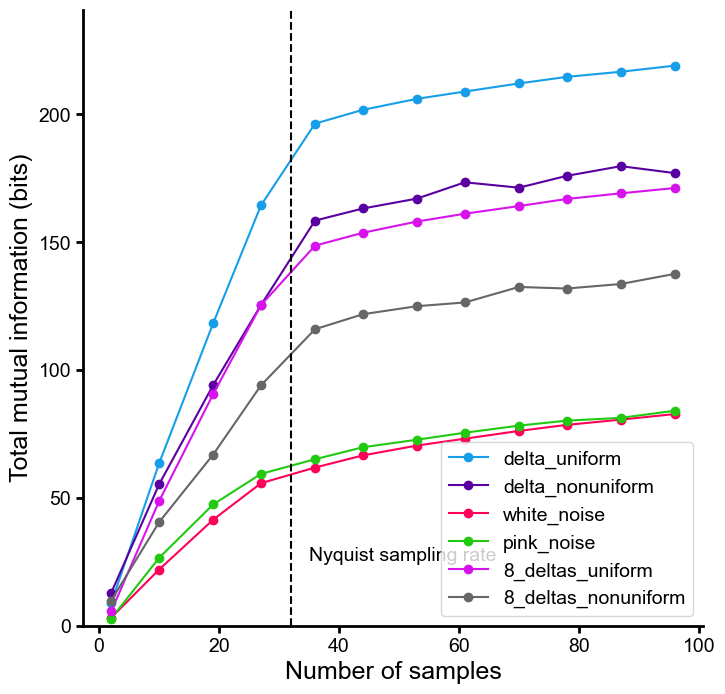

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for object_name, mutual_information in mi_by_object.items():

    total_mi = np.array(mutual_information) * num_samples[:, None]

    max_mi = np.max(total_mi, axis=1)

    # ax.plot(num_samples, mutual_information, 'o-')
    ax.plot(num_samples, max_mi, 'o-', label=object_name)
    ax.set_xlabel('Number of samples')
    ax.set_ylabel('Total mutual information (bits)')

    ax.set(ylim=(0, max(1.1 * np.max(max_mi), ax.get_ylim()[1])))

# plot a dashed line at the number of nyquist samples
ax.axvline(num_nyquist_samples, linestyle='--', color='k')
ax.text(num_nyquist_samples + 3, 0.2 * np.max(total_mi), 'Nyquist sampling rate', rotation=0, va='center')
clear_spines(ax)
ax.legend()

## Show phase transition behavior with increasing Nyquist samples

In [18]:
N_objects = 2000
num_bootstraps = 10
noise_sigma = 1e-3
num_samples = np.linspace(2, 96, 15).astype(int)
num_nyquist_samples_list = [8, 16, 24, 32, 48]



objects_fn = lambda : np.array([sample_amplitude_object('delta', num_deltas=1, gaussian_mixture_position=False) for i in range(N_objects)])

mi_vs_num_nyquist_samples = {}
for num_nyquist_samples in tqdm(num_nyquist_samples_list):

  mutual_information = []
  for N in tqdm(num_samples):
    erasure_mask = onp.zeros(OBJECT_LENGTH)
    sample_indices = onp.linspace(0, OBJECT_LENGTH - 1, N).astype(int)
    erasure_mask[sample_indices] = 1
    erasure_mask = np.array(erasure_mask, dtype=bool)
    mi_bootstraps = []
    for k in range(num_bootstraps):
      initial_kernel, initial_params, optimized_params, objects, initial_mi, optimized_mi = optimize_PSF_and_estimate_mi(
          objects_fn, noise_sigma, erasure_mask, num_nyquist_samples=num_nyquist_samples, nyquist_sample_output=False)
      mi_bootstraps.append(optimized_mi)

    mutual_information.append(onp.array(mi_bootstraps).max())
  mi_vs_num_nyquist_samples[num_nyquist_samples] = mutual_information


  0%|          | 0/4 [00:00<?, ?it/s]

initial loss -4.701567050021177


initial loss -4.798616915048982


initial loss -2.629090424614936


initial loss -1.7211548636532932


initial loss -1.3708614647103687


initial loss -1.0463996598476548


initial loss -1.0994167020505567


initial loss -0.726067028851027


initial loss -0.8485153489046193


initial loss -0.7586317535327279


initial loss -0.642267603746642


initial loss -0.5784645413161276


 25%|██▌       | 1/4 [09:42<29:06, 582.17s/it]

initial loss -4.342236741594238


initial loss -3.971414464268886


initial loss -3.7777570372367175


initial loss -3.1993835800155552


initial loss -2.1486573939738456


initial loss -1.7836031834093646


initial loss -1.3778860937774218


initial loss -1.328519035632924


initial loss -1.2217731063821065


initial loss -1.119453676300826


initial loss -1.0767603840934292


initial loss -0.9351847159356677


 50%|█████     | 2/4 [18:18<18:06, 543.17s/it]

initial loss -3.5567862905615857


initial loss -3.9119874023569055


initial loss -3.5688557928212297


initial loss -3.8811295526591327


initial loss -2.60121458416637


initial loss -2.4511515629022593


initial loss -1.9255422218800358


initial loss -1.7946845212908433


initial loss -1.6802265789453543


initial loss -1.3619789513822287


initial loss -1.334534823409594


initial loss -1.2876021630957393


 75%|███████▌  | 3/4 [26:47<08:47, 527.79s/it]

initial loss -3.4852768890413275


initial loss -3.7917753630239623


initial loss -3.7769413191029337


initial loss -2.9174658881049402


initial loss -3.1922002453824976


initial loss -2.5982614324941546


initial loss -1.981024745058133


initial loss -2.001989549053617


initial loss -1.8426319829759548


initial loss -1.641344811002385


initial loss -1.6062247026868326


initial loss -1.3762189321073512


100%|██████████| 4/4 [35:26<00:00, 531.56s/it]


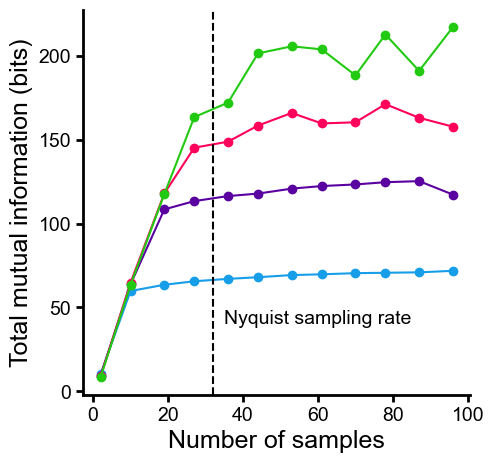

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for num_nyquist_samples, mutual_information in mi_vs_num_nyquist_samples.items():

    total_mi = np.array(mutual_information) * num_samples


    # ax.plot(num_samples, mutual_information, 'o-')
    ax.plot(num_samples, total_mi, 'o-', label=num_nyquist_samples)
    ax.set_xlabel('Number of samples')
    ax.set_ylabel('Total mutual information (bits)')

    # ax.set(ylim=(0, max(1.1 * np.max(total_mi), ax.get_ylim()[1])))

# plot a dashed line at the number of nyquist samples
ax.axvline(num_nyquist_samples, linestyle='--', color='k')
ax.text(num_nyquist_samples + 3, 0.2 * np.max(total_mi), 'Nyquist sampling rate', rotation=0, va='center')
clear_spines(ax)
ax.legend()

## Show transition behavior with different SNR levels

In [21]:
N_objects = 2000
num_bootstraps = 10
num_samples = np.linspace(2, 96, 15).astype(int)

objects_fn = lambda : np.array([sample_amplitude_object('delta', num_deltas=1, gaussian_mixture_position=False) for i in range(N_objects)])

noise_sigma_list = [1e-6, 1e-5, 1e-4, 1e-3, 4e-3]

mi_vs_num_samples_by_noise = {}
for noise_sigma in tqdm(noise_sigma_list):
  mutual_information = []
  for N in num_samples:
    erasure_mask = onp.zeros(OBJECT_LENGTH)
    sample_indices = onp.linspace(0, OBJECT_LENGTH - 1, N).astype(int)
    erasure_mask[sample_indices] = 1
    erasure_mask = np.array(erasure_mask, dtype=bool)
    mi_bootstraps = []
    for k in range(num_bootstraps):
      initial_kernel, initial_params, optimized_params, objects, initial_mi, optimized_mi = optimize_PSF_and_estimate_mi(
          objects_fn, noise_sigma, erasure_mask, num_nyquist_samples=NUM_NYQUIST_SAMPLES, nyquist_sample_output=False)
      mi_bootstraps.append(optimized_mi)

    mutual_information.append(onp.array(mi_bootstraps).max())
  mi_vs_num_samples_by_noise[noise_sigma] = mutual_information


  0%|          | 0/5 [00:00<?, ?it/s]

initial loss -13.576697474560994
initial loss -13.655811207741602
initial loss -13.295624590676434
initial loss -13.651962548484729
initial loss -12.449905414931107
initial loss -10.955523357792229
initial loss -9.638196446416806
initial loss -8.631023795951196
initial loss -8.079850665277828
initial loss -7.812550547302799
initial loss -7.407340544342693
initial loss -6.976885661623567


 20%|██        | 1/5 [23:14<1:32:57, 1394.32s/it]

initial loss -10.020575687456397
initial loss -10.209697583860482
initial loss -9.962886191349963
initial loss -9.846181286764244
initial loss -9.094744502389625
initial loss -7.614331564342643
initial loss -6.390456970440222
initial loss -5.218004519793439
initial loss -4.901978222052612
initial loss -4.425860253755276
initial loss -4.101822660527802
initial loss -3.5983104078590338


 40%|████      | 2/5 [42:00<1:01:49, 1236.50s/it]

initial loss -6.809440580133052
initial loss -6.735342939945667
initial loss -6.643753172857486
initial loss -6.349032183319214
initial loss -6.312010169437643
initial loss -5.1253570752639
initial loss -4.424632256712819
initial loss -3.9038516107080783
initial loss -3.321265037652131
initial loss -3.0622937807297563
initial loss -2.8514896540100048
initial loss -2.5393777775826125


 60%|██████    | 3/5 [1:03:19<41:52, 1256.05s/it]

initial loss -3.5360161738769884
initial loss -3.670593055668964
initial loss -3.705611067681058
initial loss -3.174481584861725
initial loss -3.2778446622242097
initial loss -2.6984833024883477
initial loss -2.290787618693455
initial loss -2.0289430626987532
initial loss -1.8036662351349422
initial loss -1.8241193623864262
initial loss -1.6757311397005485
initial loss -1.3399908997709933


 80%|████████  | 4/5 [1:23:22<20:35, 1235.17s/it]

initial loss -1.6758521916355789
initial loss -1.972858912395681
initial loss -1.691550639913837
initial loss -1.8741901619396129
initial loss -1.6141291789175756
initial loss -1.2882957349737583
initial loss -1.1311285605812595
initial loss -0.9822955466159928
initial loss -0.9329985651830155
initial loss -0.9368424665280722
initial loss -0.9612887756177683
initial loss -0.7174826823079524


100%|██████████| 5/5 [1:35:47<00:00, 1149.48s/it]


[Text(0.5, 1.0, 'SNR comparison')]

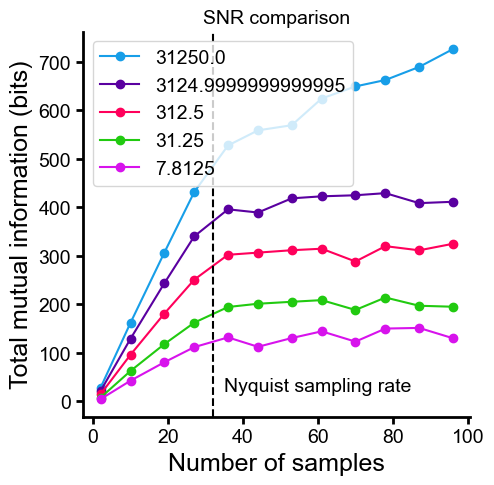

In [25]:
snrs = (1 / NUM_NYQUIST_SAMPLES) / np.array(noise_sigma_list)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for (noise_sigma, mutual_information), snr in zip(mi_vs_num_samples_by_noise.items(), snrs):

    total_mi = np.array(mutual_information) * num_samples

    # ax.plot(num_samples, mutual_information, 'o-')
    ax.plot(num_samples, total_mi, 'o-', label=snr)
    ax.set_xlabel('Number of samples')
    ax.set_ylabel('Total mutual information (bits)')

    # ax.set(ylim=(0, max(1.1 * np.max(total_mi), ax.get_ylim()[1])))

# plot a dashed line at the number of nyquist samples
ax.axvline(num_nyquist_samples, linestyle='--', color='k')
ax.text(num_nyquist_samples + 3, 0.2 * np.max(total_mi), 'Nyquist sampling rate', rotation=0, va='center')
clear_spines(ax)
ax.legend()
ax.set(title='SNR comparison')